In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df = pd.read_csv('../DATA/winequality-red.csv', sep=';')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
df['quality'] = le.fit_transform(df['quality'])

In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [21]:
le.classes_

array([3, 4, 5, 6, 7, 8])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
X_train.shape

(1119, 11)

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtc = DecisionTreeClassifier(max_depth=3)

In [29]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
from sklearn.metrics import accuracy_score, classification_report

In [32]:
y_pred = dtc.predict(X_test)

In [33]:
test_acc = accuracy_score(y_test, y_pred)

In [34]:
y_pred_train = dtc.predict(X_train)

In [35]:
train_acc = accuracy_score(y_train, y_pred_train)

In [36]:
print(train_acc, test_acc)

0.5996425379803396 0.5166666666666667


In [37]:
max_depth = 25
train_acc = []
test_acc = []

for depth in range(1, max_depth):
    dtc = DecisionTreeClassifier(max_depth=depth)
    dtc.fit(X_train, y_train)
    
    y_pred_train = dtc.predict(X_train)
    y_pred_test = dtc.predict(X_test)
    
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))

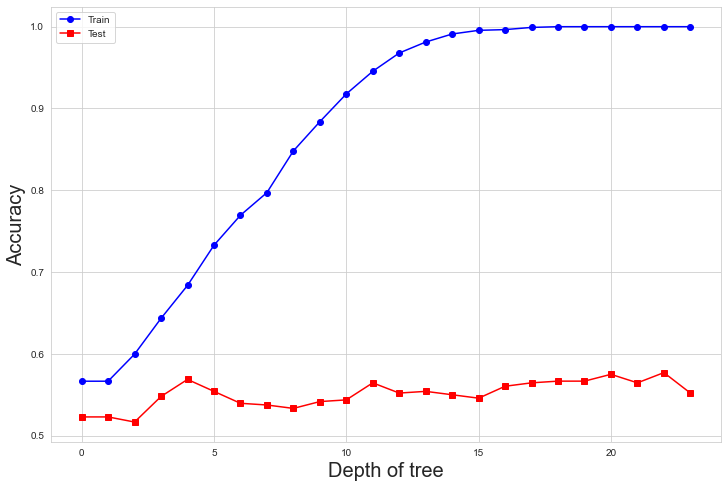

In [46]:
plt.figure(figsize = (12, 8))
sns.set_style('whitegrid')
plt.plot(train_acc, 'bo-')
plt.plot(test_acc, 'rs-')
plt.legend(['Train', 'Test'])
plt.xlabel('Depth of tree', size = 20)
plt.ylabel('Accuracy', size = 20);